# Cal Unit datasets
Running the cal unit through our correlation function, what are we seeing with respect to noise and peak decorrelation?

In [ ]:
# imports
import numpy as np
import pandas as pd
import numpy.ma as ma
import importlib
import matplotlib
from astropy.stats import sigma_clipped_stats
from importlib import reload
import time
from astropy.io import fits
from importlib import reload

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#personal
from pipeline.est_pipeline import *
from pipeline.code.file_reader import *
from pipeline.code.corr_plots import *
from pipeline.code.cluster import *

import pipeline.code.Estimator as es
import pipeline.code.Estimator_R as er
import pipeline.code.graph_code as gc
import pipeline.code.Correlator as Cor

## Fitting functions:
import t_const_code as tc

In [46]:
bw_path = '/data/imaka/20210720/ao/'
out_dir = "/home/emcewen/test_cal/"

## 0: Identify Cal unit files

In [17]:
bw_range = np.arange(7)

bw_paths = [f"/data/imaka/20210720/ao/bw{b}/" for b in bw_range]

bw_files = []
bw_names = []

for i in np.arange(7):
    p = f"/data/imaka/20210720/ao/bw{i}/"
    files = os.listdir(p)
    bw_fits = [p + fn for fn in files if fnmatch.fnmatch(fn, 'imakacbdata*.fits')]
    bw_name =  [nm.replace('.fits', f'.bw{i}') for nm in files if fnmatch.fnmatch(nm, 'imakacbdata*.fits')]
    bw_files.extend(bw_fits)
    bw_names.extend(bw_name)

In [18]:
bw_names

['imakacbdata.g0.00.bw0',
 'imakacbdata.g0.20.bw0',
 'imakacbdata.g0.40.bw0',
 'imakacbdata.g0.60.bw0',
 'imakacbdata.g0.00.bw1',
 'imakacbdata.g0.20.bw1',
 'imakacbdata.g0.40.bw1',
 'imakacbdata.g0.60.bw1',
 'imakacbdata.g0.00.bw2',
 'imakacbdata.g0.20.bw2',
 'imakacbdata.g0.40.bw2',
 'imakacbdata.g0.60.bw2',
 'imakacbdata.g0.00.bw3',
 'imakacbdata.g0.20.bw3',
 'imakacbdata.g0.40.bw3',
 'imakacbdata.g0.60.bw3',
 'imakacbdata.g0.00.bw4',
 'imakacbdata.g0.20.bw4',
 'imakacbdata.g0.40.bw4',
 'imakacbdata.g0.60.bw4',
 'imakacbdata.g0.00.bw5',
 'imakacbdata.g0.20.bw5',
 'imakacbdata.g0.40.bw5',
 'imakacbdata.g0.60.bw5',
 'imakacbdata.g0.00.bw6',
 'imakacbdata.g0.20.bw6',
 'imakacbdata.g0.40.bw6',
 'imakacbdata.g0.60.bw6']

## 1: Run Cal Unit files through correlator

In [19]:
def calc_par(name, file_path, tmax, out_dir):
    ## a parallel correlation
    curr_data = Cor.Correlator(name, file_path, out_dir, tmax=tmax, s_sub=True, tt_sub=True)

    t0 = time.time()
    print("Starting parallel ACor")
    curr_data.acor_gen_par()
    t1 = time.time()
    print("... Finished in ", str(t1-t0))

    print("Starting XCor")
    curr_data.ccor_gen_par()
    t2 = time.time()
    print("... Finished in ", str(t2-t1))

    print("Writing Fits File")
    curr_data.fits_write()
    t3 = time.time()
    print("... Finished in ", str(t3-t2))

In [21]:
# for each bw file, run through standard correlation
out_dir = "/home/emcewen/test_cal/"
tmax = 500

for i in range(len(bw_files)):
    name = bw_names[i]
    file_path = bw_files[i]
    calc_par(name, file_path, tmax, out_dir)

Starting parallel ACor
... Finished in  42.44711947441101
Starting XCor
... Finished in  103.70996522903442
Writing Fits File
... Finished in  0.12878632545471191
Starting parallel ACor
... Finished in  44.97599697113037
Starting XCor
... Finished in  112.36642098426819
Writing Fits File
... Finished in  0.1591048240661621
Starting parallel ACor
... Finished in  41.75684309005737
Starting XCor
... Finished in  112.68062353134155
Writing Fits File
... Finished in  0.1525712013244629
Starting parallel ACor
... Finished in  43.07526731491089
Starting XCor
... Finished in  100.20602798461914
Writing Fits File
... Finished in  0.15155839920043945
Starting parallel ACor
... Finished in  45.685994386672974
Starting XCor
... Finished in  103.02197360992432
Writing Fits File
... Finished in  0.138075590133667
Starting parallel ACor
... Finished in  43.54691123962402
Starting XCor
... Finished in  105.78035068511963
Writing Fits File
... Finished in  0.12521648406982422
Starting parallel ACor
..

## 3: Check background on CalUnit

### 3.1 Checking one Cal-unit file

In [44]:
# for all files in 
cor_dir = out_dir + "fits/"
cor_files = os.listdir(cor_dir)
cor_path = [cor_dir + f for f in cor_files]

FileNotFoundError: [Errno 2] No such file or directory: 'tmp/fits/'

In [45]:
p_file = cor_path[1]
pull_data = Cor.Correlator("", "", "", f_file = p_file)

NameError: name 'cor_path' is not defined

In [67]:
pull_data.hz_pull()

183.2211

In [32]:
pull_data.acor_graph(med_sub=False, avg_sub=False, avg_len=10)

'/home/emcewen/test_cal/plots/acor_png/imakacbdata.g0.60.bw3_tts_acor_avg_0.png'

### 3.2 Generate image plots

In [ ]:
# plot: for one 1000 length file, background taken at 200 intervals
p_file = cor_path[1]

# pull file 
pull_data = Cor.Correlator("", "", "", f_file = p_file)
avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
center_avg = np.average(avg_acor[:2], axis=(0))

tmax = 1000

background_cube = []
td0_cube = []
td10_cube = []


# take average at 200 increments
for t in range(0, tmax, 200):
    avg_tmp = np.average(center_avg[t:t+199], axis = 0)
    background_cube.append(avg_tmp)
    td0_cube.append(center_avg[0] - avg_tmp)
    td10_cube.append(center_avg[10] - avg_tmp)
    
t_list = np.arange(len(td10_cube))
    
graph_3_rows_t_mat(background_cube, td0_cube, td10_cube, t_list, title = f"Bakground avg every 200 steps  (t*200) \n {pull_data.name}", label_1="Average", label_2="0 sub avg", label_3="10 sub avg")

## 4: Run CalUnit through fit functions

In [49]:
import t_const_code as tc

In [31]:
def bg_plot(p_file, tmax_p, c_min = 100, c_max = 500):
    
    ## Center Peak Plots
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    center_peak_avg = tc.center_peak_pull(p_file)
    dt = np.arange(tmax_p) #integers

    # Plotting center peaks
    fig, ax =  plt.subplots(1,1,figsize=(10,8))
    g_cmap = cm.get_cmap('Greens', 8)
    for i in range(3): 
        c_float = (i+2)/6
        ax.plot(dt, center_peak_avg[i][dt], label = "WFS" + str(i), color = g_cmap(c_float))
        #ax[1].plot(t, np.log(center_peak_avg[i][dt]),  color = g_cmap(c_float))

    # Log fit
    ax.axhline(0, color="black", alpha=0.3)
    #ax[1].axvline(c_min, color="black", alpha=0.3)
    #ax[1].axvline(c_max, color="black", alpha=0.3)

    ax.legend(loc = 'upper right')
    ax.set_ylabel('Intensity')
    #ax[1].legend(loc = 'upper right')
    #ax[1].set_ylabel('Intensity, log')
    #ax[1].set_xlabel('frames')

    ax.set_title(f'WFS average Autocorrelation peak \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
    #fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
    #plt.savefig(fname, dpi=300)
    return fig

In [43]:
p_file = cor_path[1]
bg_plot(p_file, 450, c_min = 50, c_max = 100).show()

NameError: name 'cor_path' is not defined

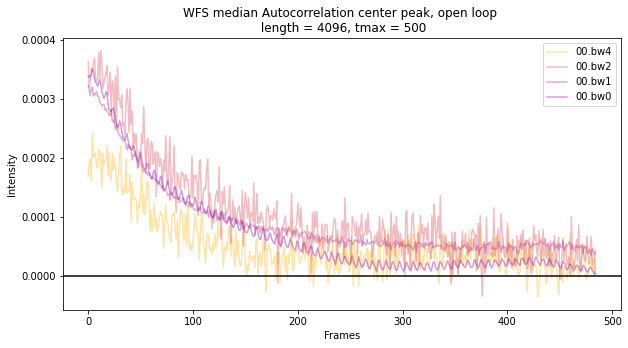

In [48]:
# plotting all the 0 (open) files

## File Structure
p_file_pre = '/home/emcewen/test_cal/fits/imakacbdata.g0.00.bw'
p_file_suf = '_tmax500_tts.fits'
bw_range = np.arange(3)
bw_range = [0,1,2,4]
tmax_p = 485

# Plotting center peaks
fig, ax =  plt.subplots(1,1,figsize=(10,5))
g_cmap = cm.get_cmap('plasma', 8)
dt = np.arange(tmax_p) #integer

for i in np.flip(bw_range):
    p_file = p_file_pre + str(i) + p_file_suf
    c_float = (i+2)/8
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    center_peak_avg = tc.center_peak_pull(p_file)
    center_avg = np.median(center_peak_avg[:2], axis=0)

    ax.plot(dt, center_avg[dt], color = g_cmap(c_float), label=f"00.bw{i}", alpha = 0.4)
    ax.axhline(0, color="black", alpha=0.3)
    ax.legend(loc = 'upper right')

ax.set_title(f'WFS median Autocorrelation center peak, open loop \n length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
ax.axhline(0, color="black", alpha=0.3)
ax.legend()
ax.set_ylabel('Intensity')
ax.set_xlabel('Frames')
plt.show()

In [ ]:
## plotting all the 0 (open) files
## t = 0

fig, ax =  plt.subplots(1,1,figsize=(10,5))
g_cmap = cm.get_cmap('Greens', 8)
bw_range = [0,1,2,4]
bw_names = [f"00.bw{i}" for i in bw_range]

#Want to take the t=0 for each file, offsetting them a bit so that we can see different wfs
for e, i in enumerate(bw_range):
    # pulling data
    p_file = p_file_pre + str(i) + p_file_suf
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
    center_peak_avg = avg_acor[:, :, 7, 7]
    
    for wfs in range(3):
        c_float = (wfs+2)/6
        y = center_peak_avg[wfs, 0]
        plt.plot([e + wfs/10], [y], marker='o', color=g_cmap(c_float))
        y = center_peak_avg[wfs, 1]
        plt.plot([e + wfs/10], [y], marker='o', color=g_cmap(c_float))

plt.xticks(np.arange(4), bw_names, rotation ='vertical')
plt.title("Open Loop Cals, t=0 values per WFS")
#plt.xlabel("00.bw")
plt.show()

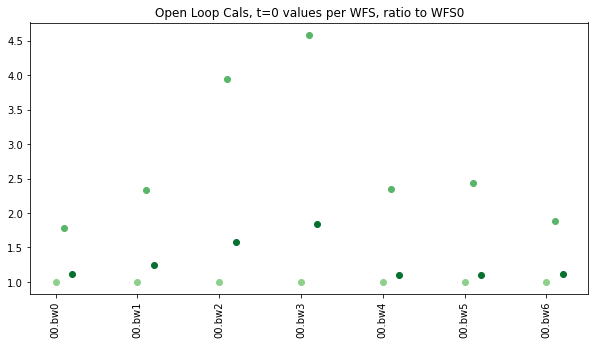

In [70]:
# plotting ratios to WFS0:

## plotting all the 0 (open) files
## t = 0

fig, ax =  plt.subplots(1,1,figsize=(10,5))
g_cmap = cm.get_cmap('Greens', 8)
bw_range = np.arange(7)
bw_names = [f"00.bw{i}" for i in bw_range]

#Want to take the t=0 for each file, offsetting them a bit so that we can see different wfs
for e, i in enumerate(bw_range):
    # pulling data
    p_file = p_file_pre + str(i) + p_file_suf
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
    center_peak_avg = avg_acor[:, :, 7, 7]
    
    for wfs in range(3):
        c_float = (wfs+2)/5
        y = center_peak_avg[wfs, 0] / center_peak_avg[0, 0]
        plt.plot([e + wfs/10], [y], marker='o', color=g_cmap(c_float))

plt.xticks(bw_range, bw_names, rotation ='vertical')
plt.title("Open Loop Cals, t=0 values per WFS, ratio to WFS0")
#plt.xlabel("00.bw")
plt.show()

#### Open loop: Time constant Fitting

In [96]:
### Per loop, per WFS fits and average fits
reload(tc)
bw_range = [0,1,2,4]
fts_f = [p_file_pre + str(i) + p_file_suf for i in bw_range]

# Finding fits per WFS
a_lst_wfs = []
e_lst_wfs = []

# Calculating fit parameters for all files, average per aocb
for file in fts_f:
    a_lst_tmp = []
    e_lst_tmp = []
    for wfs in range(3):
        try:
            pull_data = Cor.Correlator("", "", "", f_file = p_file)
            center_avg, t, f1, f2 = tc.decay_fn_wfs_2(file, 900, wfs=wfs, c_min = 50, c_max = 300)
            
            a = - np.around(1/f1[0] / pull_data.hz_pull(), 4) 
            
            a_lst_tmp.append(a)
            e_lst_tmp.append(a*f2[0]/f1[0])
        except:
            print('error with file: ', file)
            a_lst_tmp.append(0) # files with errors sent to 0
            e_lst_tmp.append(0)
    a_lst_wfs.append(a_lst_tmp)
    e_lst_wfs.append(e_lst_tmp)

In [97]:
a_lst_wfs_T = np.array(a_lst_wfs).T
e_lst_wfs_T = np.array(e_lst_wfs).T

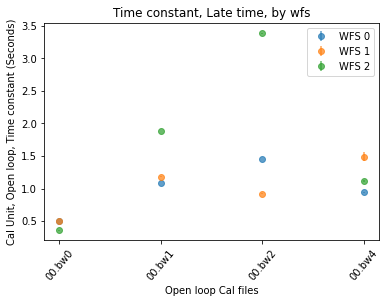

In [98]:
# plotting all time coefficients 
color_list = ["r", "b", "cyan"]
bw_range = [0,1,2,4]
bw_names = [f"00.bw{i}" for i in bw_range]
plt.figure(figsize=(6,4))

#for c in count_lst:
#    plt.axvline(c, c="black", alpha = 0.3)
    
for wfs in range(3):
    plt.errorbar(np.arange(4), a_lst_wfs_T[wfs], yerr = e_lst_wfs_T[1,wfs,:], fmt = 'o', alpha = 0.7, label = f"WFS {wfs}")
    
plt.xticks(np.arange(4), bw_names, rotation = 50)
plt.ylabel('Cal Unit, Open loop, Time constant (Seconds)')
plt.xlabel('Open loop Cal files')
plt.title("Time constant, Late time, by wfs")
plt.legend()
#plt.ylim(-4, 0.5)
plt.show()

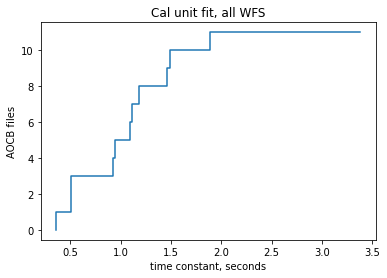

In [102]:
## Cumulative Histogram of time constants

# Some fake data:
sorted_data = np.sort(a_lst_wfs_T.flatten())  # Or data.sort(), if data can be modified

# Filter out outliers:
data_filt = sorted_data #BUG this is very rough

# Cumulative counts:
plt.step(data_filt, np.arange(data_filt.size))  # From 0 to the number of data points-1
#plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

plt.title(f"Cal unit fit, all WFS")
plt.ylabel("AOCB files")
plt.xlabel("time constant, seconds")
plt.show()

## Plotting all Open Loop time constants

Text(0.5, 1.0, 'WFS median Autocorrelation peak, 00 open loop \n length = 4096, tmax = 500')

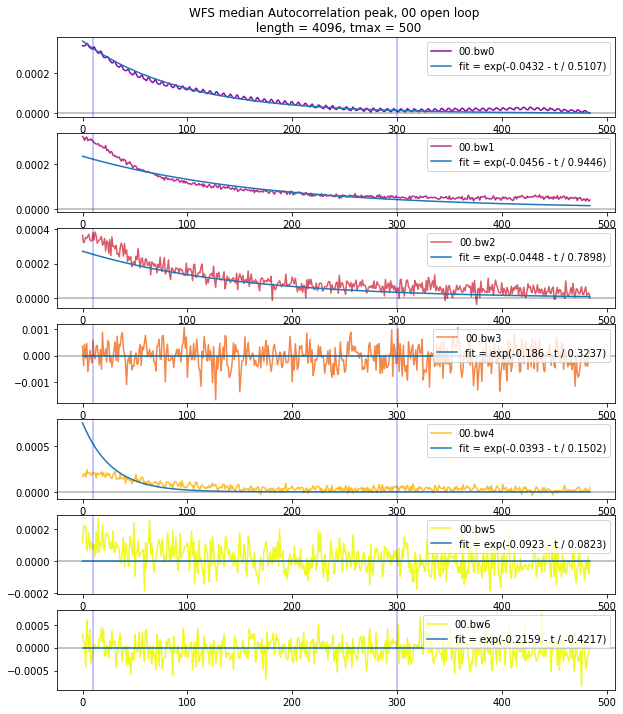

In [27]:
# for each open loop, plot all wfs, fit a curve, show fit

## File Structure
p_file_pre = '/home/emcewen/test_cal/fits/imakacbdata.g0.00.bw'
p_file_suf = '_tmax500_tts.fits'
bw_range = np.arange(7)
tmax_p = 485
c_min = 10
c_max = 300


## Center Peak Plots
dt = np.arange(tmax_p) #integers

# Plotting center peaks
fig, ax =  plt.subplots(7,1,figsize=(10,12))
g_cmap = cm.get_cmap('plasma', 8)

for i in np.flip(bw_range):
    p_file = p_file_pre + str(i) + p_file_suf
    c_float = (i+2)/8
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    center_peak_avg = tc.center_peak_pull(p_file)
    center_avg = np.median(center_peak_avg[:2], axis=0)

    ax[i].plot(dt, center_avg[dt], color = g_cmap(c_float), label=f"00.bw{i}")
    ax[i].axhline(0, color="black", alpha=0.3)
    
    # fit variables
    __, t, f1 = tc.decay_fn(p_file, tmax_p, c_min = c_min, c_max = c_max)
    log_fit = tc.Linear_est(t, f1[0], f1[1])
    a = np.around(1/f1[0] / pull_data.hz_pull(), 4) 
    b = np.around(f1[1] / pull_data.hz_pull(), 4) 
    ax[i].plot(t, np.exp(log_fit), label = f"fit = exp({b} - t / {-a})")
    ax[i].axvline(c_min, color="blue", alpha=0.3)
    ax[i].axvline(c_max, color="blue", alpha=0.3)
    
    ax[i].legend(loc = 'upper right')

ax[0].set_title(f'WFS median Autocorrelation peak, 00 open loop \n length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
#fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
#plt.savefig(fname, dpi=300)


In [21]:
#Plot central peak on one plot
bw_suff = ["00","20","40","60"]

def bg_avg_plot(p_file_pre, p_file_suf, tmax_p):
    
    ## Center Peak Plots
    dt = np.arange(tmax_p) #integers

    # Plotting center peaks
    fig, ax =  plt.subplots(4,1,figsize=(10,8))
    g_cmap = cm.get_cmap('Greens', 8)
    
    for i, e in enumerate(bw_suff):
        p_file = p_file_pre + e + p_file_suf
        c_float = (i+2)/6
        pull_data = Cor.Correlator("", "", "", f_file = p_file)
        center_peak_avg = tc.center_peak_pull(p_file)
        center_avg = np.average(center_peak_avg[:2], axis=0)
        
        ax[i].plot(dt, center_avg[dt], label = e, color = g_cmap(c_float))
        ax[i].axhline(0, color="black", alpha=0.3)
        ax[i].legend(loc = 'upper right')
        #ax[1].plot(t, np.log(center_peak_avg[i][dt]),  color = g_cmap(c_float))

    ax[0].set_title(f'WFS average Autocorrelation peak \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
    #fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
    #plt.savefig(fname, dpi=300)
    return fig

In [62]:
cor_path[1]

'/home/emcewen/test_cal/fits/imakacbdata.g0.60.bw3_tmax500_tts.fits'

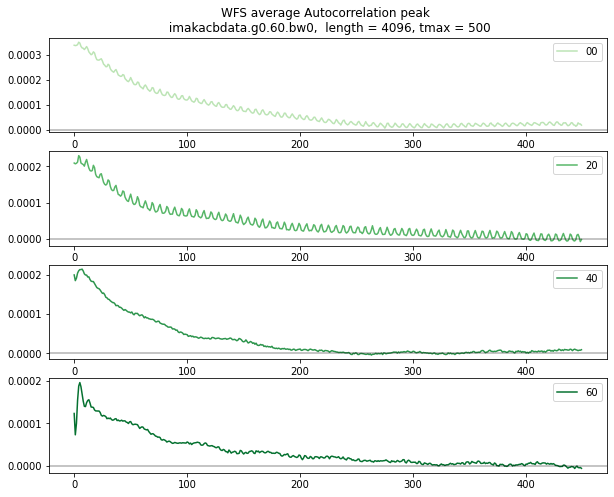

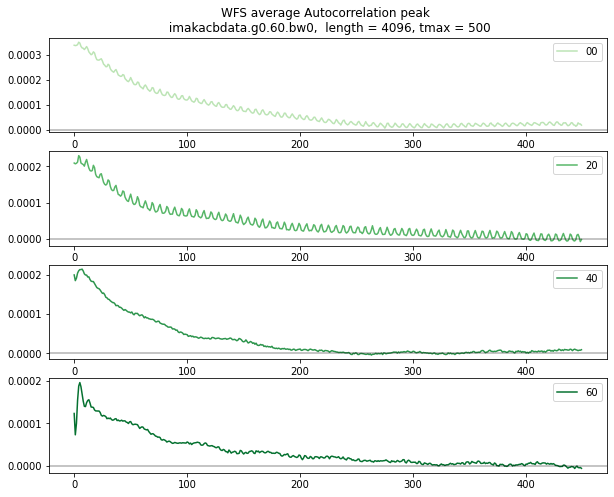

In [28]:
p_file_pre = '/home/emcewen/test_cal/fits/imakacbdata.g0.'
p_file_suf = '.bw0_tmax500_tts.fits'
bg_avg_plot(p_file_pre, p_file_suf, 450)

In [71]:
cor_path

['/home/emcewen/test_cal/fits/imakacbdata.g0.40.bw1_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.60.bw3_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.60.bw5_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.60.bw6_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.40.bw2_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.00.bw2_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.20.bw6_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.20.bw3_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.40.bw0_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.20.bw0_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.20.bw5_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.20.bw1_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.40.bw6_tmax500_tts.fits',
 '/home/emcewen/test_cal/fits/imakacbdata.g0.00.bw5_tmax500_tts.fits',
 '/hom

In [29]:
p_file = cor_path[-3]
tc.decay_plot(p_file, 450, c_min = 50, c_max = 150)

NameError: name 'cor_path' is not defined

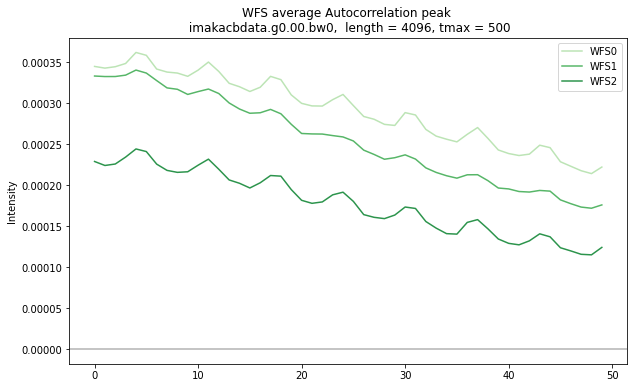

In [38]:
## looking at sinusoidal fit?

s_file =  '/home/emcewen/test_cal/fits/imakacbdata.g0.00.bw0_tmax500_tts.fits'

bg_plot(s_file, 50, c_min = 50, c_max = 100).show()

In [37]:
def bg_fit_plot(p_file, tmax_p, c_min = 100, c_max = 500):
    
    ## Center Peak Plots
    pull_data = Cor.Correlator("", "", "", f_file = p_file)
    center_peak_avg = tc.center_peak_pull(p_file)
    dt = np.arange(tmax_p) #integers

    # Plotting center peaks
    fig, ax =  plt.subplots(1,1,figsize=(10,6))
    g_cmap = cm.get_cmap('Greens', 8)
    for i in range(3): 
        c_float = (i+2)/6
        ax.plot(dt, center_peak_avg[i][dt], label = "WFS" + str(i), color = g_cmap(c_float))
        #ax[1].plot(t, np.log(center_peak_avg[i][dt]),  color = g_cmap(c_float))

    # Log fit
    ax.axhline(0, color="black", alpha=0.3)
    #ax[1].axvline(c_min, color="black", alpha=0.3)
    #ax[1].axvline(c_max, color="black", alpha=0.3)

    ax.legend(loc = 'upper right')
    ax.set_ylabel('Intensity')
    #ax[1].legend(loc = 'upper right')
    #ax[1].set_ylabel('Intensity, log')
    #ax[1].set_xlabel('frames')

    ax.set_title(f'WFS average Autocorrelation peak \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
    #fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
    #plt.savefig(fname, dpi=300)
    return fig